# Variational Autoencoder
Based on variational inference

$$P(Z|X) = \frac{P(Z,X)}{P(X)}$$

## Some basic information theory
### Information 
$I = -log(P(x))$
* Measures the factor of uncertainty removed when x is known
* 1 bit can be thought of as information that reduces uncertainty
    by a factor of 2
E.g. Let's say there is 50% chance of weather being sunny and 
50% chance of rain tomorrow. When the weather station tells us it is going to be sunny, they have given us 1 bit of information.

> Uncertainty reduction is the inverse of the event's probability

E.g. If the weather probabilities are sunny 75% and rain 25%,
finding out that it is going to be rainy will reduce our 
uncertainty by $1/0.25 = 4$. This corresponds to $log_2(4) = 2$ bits of information $log_2(\frac{1}{0.25}) = -log_2(0.25)$

### Entropy 
$H = \sum_x-log(P(x)) * P(x))$  
* Can be thought of as average amount of information relayed by a certain distribution
E.g in the above case, the weather station on average transmits
$$ H = 0.75 \times -log(0.75) + 0.25 \times (-log(0.25)) 
  = 0.81$$ bits of useful information

### Cross-entropy
$$H(P,Q) = \sum_x P(x)(-log(Q(x))$$

E.g Lets say we use 2 bits to encode our weather prediction
this can be thought of as us predicting the weather to have
a 25% chance of either being sunny or rainy
The average number of actual bits sent is
$H = 0.75 \times 2 + 0.25 \times 2 = 2 $bits. If using different number of bits for the different predictions $H = 0.75 \times 2 + 0.25 \times 3 = 2.25 $bits 

Based on the entropy and cross-entropy, we can see that our _predicted_ probability distribution Q(x) differs from the _actual_ probability distribution P(x) by 
$KL(P||Q) = 2.25 - 0.81 = 1.54 $bits  
If predictions are perfect i.e. Q(x) = P(x), then H(P,Q) = H(P)  
Therefore, $H(P,Q) = H(P) + KL(P||Q)$  
$KL(P||Q)$ means KL-divergence of Q w.r.t P

\begin{align}
KL(P||Q) &= H(P,Q) - H(P)\\
         &= \sum_x P(x)(-log(Q(x)) -  \sum_xP(x)(-log(P(x))\\
         &= \sum_{x} P(x)(-log(Q(x) - (-log(P(x)))\\
         &= \sum_x P(x)(log(P(x)) - log(Q(x)))\\
         &= \sum_x P(x)(log(\frac{P(x)}{Q(x)}))\\
\end{align}
#### Some properties of KL-divergence
1. $KL(P||Q)$ is alwaysgreater than or equal to 0
2. $KL(P||Q)$ is not the same as $KL(Q||P)$


## Variational Bayes

$$P(Z|X) = \frac{P(Z,X)}{P(X)} = \frac{P(X|Z)P(Z)}{P(X)}$$

We don't know P(X). If we were to compute it,
$P(X) = \int{P(X|Z)P(Z)dZ}$
* Intractable in many cases
* If distributions are high dimensional, integral is multi-integral

Thus, we can try to approximate the distribution. One method to approximate is Monte Carlo method (Gibbs sampling and other sampling methods) which is unbiased with high variance.

Another is variational inference which has low variance but is biased

1. Approximate P(Z|X) with Q(Z) that is tractable e.g. Gaussian
2. Play with the parameters of Q(Z) in a way that it gets close enough to P(Z|X) i.e. minimize $KL(Q(Z)||P(Z|X))$

This brings us to the following objective of minimizing 


\begin{align}
KL(Q(Z)||P(Z|X)) &= \sum_z Q(Z)log(\frac{Q(Z)}{P(Z|X)})\\
                 &= - \sum_zQ(Z) log(\frac{P(Z|X)}{Q(Z)})\\
                 &= - \sum_z Q(Z) log(\frac{P(X,Z)}{P(X) Q(Z)})\\
                 &= - \sum_z Q(Z) (log(\frac{P(X,Z)}{Q(Z)}) - log(P(X)))\\
                 &= - \sum_z Q(Z) log(\frac{P(X,Z)}{Q(Z)}) + log(P(X))\\
\end{align}
\begin{align}
\therefore log(P(X))    &= KL(Q(Z)||P(Z|X)) + \sum_z Q(Z)log(\frac{P(X,Z)}{Q(Z)})\\
                 &= KL(Q(Z)||P(Z|X)) + L\\
\end{align}


As $log(P(X))$ is a constant, to minimize $KL(Q(Z)||P(Z|X))$,
we just need to maximize $L$.

$$\because KL(Q(Z)||P(Z|X)) \geq 0$$,  
$$L \leq P(X)$$ Thus, L is a lower bound of P(X).

\begin{align}
L &= \sum_z Q(Z) log(\frac{P(X,Z)}{Q(Z)})\\
  &= \sum_z Q(Z) log(\frac{P(X|Z)P(Z)}{Q(Z)})\\
  &= \sum_z Q(Z)(log(P(X|Z)) + log(\frac{P(Z)}{Q(Z)}))\\
  &= \sum_z Q(Z) log(P(X|Z))) + \sum_z Q(Z) log(\frac{P(Z)}{Q(Z)})\\
\end{align}

$$\sum_z Q(Z) log(P(X|Z))) = E_{Q(Z)}P(X|Z)$$
$$\sum_z Q(Z) log(\frac{P(Z)}{Q(Z)}) = -KL(Q(Z)||P(Z))$$

Closed form solution for KL-divergence between two univariate Gaussian distributions:
$$ KL(p(z)||q(z)) = log\Big(\frac{\sigma_q}{\sigma_p}\Big) + \frac{\sigma_q + (\mu_q - \mu_p)^2}{2\sigma_p^2} - \frac{1}{2}$$
Therefore our regularizing term given that P(Z) has mean 0 and standard deviation of 1
$$-KL(Q(Z)||P(Z)) = -\Big[-log(\sigma_Q) + \frac{\sigma_Q^2 + \mu_Q^2}{2} - \frac{1}{2}\Big] $$
$KL(Q(Z)||P(Z)) = 0$ when Q(Z) has mean 0 and standard deviation 1
### Representing L as an autoencoder

X --> Q(Z|X) --> Z --> P(X|Z) --> X'

$E_{Q(Z)}P(X|Z)$ term acts as reconstruction error.
$P(X|Z)$ is deterministic meaning one input will get the same output all the time. Thus, it can be considered $P(X|X')$.

If $P(X|X')$ is gaussian
$$P(X|X') = e^{-|X - X'|^2}$$
$$log(P(X|X')) = -|X - X'|^2$$ --> L2 loss

If Bernoulli distribution, will be similar to cross-entropy

So far the network is all deterministic
> To make it probabilistic, 
    encoder should not parametrize Z but instead the parametrize
    the distribution that generates Z i.e. $\mu$ and $\sigma$



In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import traceback
import math
import os


from scipy.misc import imsave
from skimage.transform import resize
from PIL import Image

/home/naren/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
df = pd.read_csv('../train.csv')
labels = np.asarray(df.label).reshape(42000,1)
train_x = np.asarray(df[df.columns[1:]]).reshape(42000,28*28)/255.0
train_x2 = np.asarray(df[df.columns[1:]]).reshape(42000,28,28,1)/255.0

In [ ]:
############################ SIMPLE MODEL ###############################################
mu_data, sigma_data = 3., 1.75
mu_z, sigma_z = 0., 1.
alpha = 0.2
latent_size = 16

tf.reset_default_graph()
X = tf.placeholder(tf.float32, (None, 784))
with tf.name_scope('encoder'): #Gaussian MLP encoder
    en_1 = tf.layers.BatchNormalization()(X)
    en_1 = tf.layers.Dense(512,activation=tf.nn.elu)(en_1)
    en_1 = tf.layers.Dense(512,activation=tf.nn.tanh)(en_1)
    mean = tf.layers.Dense(latent_size)(en_1)
    log_var = tf.layers.Dense(latent_size)(en_1)

Z = tf.random_normal(mean=mu_z,stddev=sigma_z,shape=(tf.shape(mean))) * tf.exp(log_var/2) + mean
de_in = tf.placeholder(tf.float32,(None,latent_size))
with tf.name_scope('decoder'): #Bernoulli MLP decoder
    de_3 = tf.layers.BatchNormalization()(de_in)
    de_3 = tf.layers.Dense(512,activation=tf.nn.tanh)(de_3)
    de_3 = tf.layers.Dense(512,activation=tf.nn.elu)(de_3)
    output = tf.layers.Dense(784,activation=tf.nn.sigmoid)(de_3)
    output = tf.clip_by_value(output,1e-8,1-1e-8)
beta = 1.
recon_loss = tf.reduce_mean(tf.reduce_sum((tf.square(X - output)),axis=1))#tf.keras.losses.binary_crossentropy(X,output) #
#recon_loss = tf.reduce_mean(tf.reduce_sum(X * tf.log(output) + (1-X) * tf.log(1-output), 1))
kl_loss = tf.reduce_mean(0.5 * tf.reduce_sum(1 + log_var - tf.square(mean) - tf.exp(log_var), axis=1))
loss = -(recon_loss + beta*kl_loss)
adam = tf.train.AdamOptimizer()
train = adam.minimize(loss)

In [ ]:
epochs = 100
bs = 1000
with tf.Session() as sess:
    saver = tf.train.Saver()
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess,'./checkpoints/simple.ckpt')
    try:
        for i in range(epochs):
            np.random.shuffle(train_x)
            print('Ep: ' + str(i))
            for b in range(42):
                sess.run(train,{X:train_x[b*bs:b*bs+1],})#latent_samples:latent_distribution[b*bs:b*bs+1]
                if b % 1 == 0:
                    saver.save(sess,'./checkpoints/simple.ckpt')
                    rl , kl , l = sess.run([recon_loss, kl_loss, loss],{X:train_x[b*bs:b*bs+1],})
                    print("Loss: {}, Recon Loss: {}, KL Loss: {}".format(l,rl,kl))
    except Exception as e:
        traceback.format_exc(e)
    finally:
        saver.save(sess,'./checkpoints/simple.ckpt')
        print('Model saved')
        
    

In [ ]:
####################### CONV MODEL ########################################
k = 9
mu_z, sigma_z = 0., 1.
bs = 1000
latent_size = 16
tf.reset_default_graph()
X = tf.placeholder(tf.float32, (None, 28, 28, 1))
with tf.name_scope('encoder'):
    en1 = tf.layers.Conv2D(64, (k,k))(X)
    en1 = tf.nn.leaky_relu(en1)
    en2 = tf.layers.Conv2D(64, (k,k), strides=(2,2))(en1)
    en2 = tf.nn.leaky_relu(en2)
    flat = tf.keras.layers.Flatten()(en2)
    en5 = tf.layers.Dense(256,activation=tf.nn.tanh)(flat)
    mean = tf.layers.Dense(latent_size)(en5)
    log_var = tf.layers.Dense(latent_size)(en5)

Z = tf.exp(log_var/2) * tf.random_normal(mean=mu_z,stddev=sigma_z,shape=(tf.shape(mean))) + mean
d_in = tf.placeholder(tf.float32,  (None,latent_size))
with tf.name_scope('decoder'):
    de_3 = tf.layers.Dense(512)(d_in)
    de_3 = tf.nn.leaky_relu(de_3)
    de_4 = tf.layers.Dense(512,activation=tf.nn.tanh)(de_3)
    out = tf.layers.Dense(784,activation=tf.nn.sigmoid)(de_4)
    out = tf.clip_by_value(out,1e-7,1-1e-7)
'''
with tf.name_scope('decoder'):
    de1 = tf.layers.Conv2DTranspose(64,(3,3),padding='same',strides=(2,2))(Z)
    de1 = tf.nn.leaky_relu(de1)
    de2 = tf.layers.Conv2DTranspose(64,(7,7))(de1)
    de2 = tf.nn.leaky_relu(de2)
    de3 = tf.layers.Conv2DTranspose(64,(9,9))(de2)
    de3 = tf.nn.leaky_relu(de3)
    output = tf.layers.Conv2DTranspose(1,(3,3),padding='same',activation=tf.nn.sigmoid)(de3)
'''
beta = 1.
X_reshape = tf.reshape(X,[-1,784])
#recon_loss = tf.reduce_mean(tf.reduce_sum(X*tf.log(output) + (1-X) * tf.log(1-output),axis=1))#tf.reduce_sum(tf.square(X - output))
recon_loss = -tf.reduce_mean(tf.reduce_sum(tf.square(X_reshape - out),axis=1))
kl_loss = tf.reduce_mean(0.5 * tf.reduce_sum(-tf.exp(log_var) - tf.square(mean) + 1. + log_var, axis=1))
ELBO = -(recon_loss+kl_loss)
mnist_train = tf.train.AdamOptimizer().minimize(ELBO)#Maximize Lower bound

with tf.Session() as sess:
    writer = tf.summary.FileWriter('logs', sess.graph)
    sess.run(tf.global_variables_initializer())
    #sess.run(mnist_train, {X:train_x[0:bs].reshape((-1,28,28,1))})
    writer.close()
    

In [ ]:
epochs = 100
batch_s = 1000
with tf.Session() as sess:
    saver = tf.train.Saver()
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess,'./checkpoints/simple.ckpt')
    try:
        for i in range(epochs):
            print('Epoch ' + str(i))
            np.random.shuffle(train_x)
            for b in range(42):
               # Zs = sess.run(Z,{X:train_x2[b*batch_s:b*batch_s + batch_s],})
                sess.run(mnist_train,{X:train_x2[b*batch_s:b*batch_s + batch_s]})
                if b % 1 == 0:
                    saver.save(sess,'./checkpoints/mnist'+str(latent_size)+'.ckpt')
                    l,rl,kl = sess.run([ELBO,recon_loss,kl_loss],{X:train_x2[b*batch_s:b*batch_s + batch_s]})
                    print("Loss: {} R_Loss: {} KL_Loss: {}".format(l,rl,kl))
    except Exception as e:
        traceback.format_exc(e)
    finally:
        saver.save(sess,'./checkpoints/mnist'+str(latent_size)+'.ckpt')
        print('Model saved')


In [29]:
def _merge(images, size, total,resize_factor = 1.0):
#credits to https://github.com/hwalsuklee/tensorflow-mnist-VAE/blob/master/plot_utils.py
        h, w = images.shape[1], images.shape[2]
        h_ = int(h * resize_factor)
        w_ = int(w * resize_factor)
        print(images.shape,h_,w_)
        if len(images.shape) == 4:
            img = np.zeros((h_ * size[0], w_ * size[1],images.shape[3]))
        else:
            img = np.zeros((h_ * size[0], w_ * size[1]))

        for idx, image in enumerate(images):
            i = int(idx % size[1])
            j = int(idx / size[1])

            image_ = resize(image, ( h_,w_))
            if len(images.shape) == 4:
                img[j * h_:j * h_ + h_, i * w_:i * w_ + w_,:] = image_
            else:
                img[j * h_:j * h_ + h_, i * w_:i * w_ + w_] = image_
            if idx == total-1:
                break
        return img
def create_latent_manifold_2d(h_,w_,size,ckpt,data,c_=1):
    with tf.Session() as sess:
        saver = tf.train.Saver()
        sess.run(tf.global_variables_initializer())
        saver.restore(sess,ckpt)
        z = sess.run(Z, {X:data[0:1]})
        imgs = np.zeros((h_ * size[0], w_ * size[1],c_))
        for i in range(size[0]):
            z[0][0]=10/size[0]*i - 5
            for j in range(size[1]):
                z[0][1] = 10/size[1]*j - 5
                im = sess.run(out, {d_in:z.reshape([-1,2])}).reshape((-1,h_,w_,c_))
                #print(im.shape)
                imgs[i * h_:h_ * i + h_, j * w_:j * w_ + w_,:] = im
                
        return imgs

def create_latent_manifold_nd(h_,w_,size,dims,ckpt,data,maxz=None,minz=None,c_=1):
     with tf.Session() as sess:
        saver = tf.train.Saver()
        sess.run(tf.global_variables_initializer())
        saver.restore(sess,ckpt)
        imgs = np.zeros((h_ * dims, w_ * size[1],c_))
        zt = sess.run(Z, {X:data[0:1]})
        if maxz != None and minz != None:
            max_z = maxz
            min_z = minz
        else:
            max_z=math.ceil(np.max(zt))
            min_z=math.floor(np.min(zt))
        print(max_z,min_z)
        for i in range(dims):
            z = np.copy(zt)
          #  print(z)
            for j in range(size[1]):
                z[0][i] = (max_z - min_z)/size[1]*j - (max_z - min_z)/2
                im = sess.run(out, {d_in:z.reshape([-1,dims])}).reshape((-1,h_,w_,c_))
                imgs[i * h_:h_ * i + h_, j * w_:j * w_ + w_,:] = im
                
        return imgs

   

In [ ]:
with tf.Session() as sess:
    saver = tf.train.Saver()
    sess.run(tf.global_variables_initializer())
    saver.restore(sess,'./checkpoints/mnist'+str(latent_size)+'.ckpt')
    Zs = sess.run(Z,{X:train_x2[bs:2*bs]})
    print(np.max(Zs), np.min(Zs))
    imgs = sess.run(out,{d_in:Zs}).reshape((-1,28,28))
    result = _merge(imgs, (20,20), 400)
    #plt.imsave(str(latent_size) + 'd_recon_'+str(epochs)+'_epochs.png',result)
    plt.imshow(result, cmap='gray')
    

In [ ]:
'''
Need to change more than one variable for visible effects
'''
with tf.Session() as sess:
    #result=create_latent_manifold_2d(28,28,(20,20))
    result=create_latent_manifold_nd(28,28,(20,20),latent_size,'./checkpoints/mnist{}.ckpt'.format(latent_size))
   # plt.imsave('{}d_latent_manifold.png'.format(latent_size),result)
    plt.imshow(result, cmap='gray')

In [3]:
#################### FEI FACE VAE ##############################
#original imsize 360 x 260
#test 90 x 64
im_shape = (90,64,3)
num_ims = 200
data = np.ndarray((num_ims,im_shape[0],im_shape[1],im_shape[2]))
i=0
for r,d,f in os.walk('../facedataset'):
    for fn in f:
        im = Image.open(r+'/'+fn)
        im = im.resize((im_shape[1], im_shape[0]), Image.ANTIALIAS)
        data[i] = np.asarray(im) / 255.0
        i += 1
        if i is num_ims:
            break
print(data.shape)

(200, 90, 64, 3)


In [44]:
mu_z, sigma_z = 0., 1.
bs = 20
latent_size = 16
tf.reset_default_graph()
X = tf.placeholder(tf.float32, (None,) + im_shape)
with tf.name_scope('encoder'):
    en1 = tf.layers.BatchNormalization()(X)
    en1 = tf.layers.Conv2D(32,(9,9),strides=(2,2))(en1)
    en1 = tf.nn.leaky_relu(en1)
    en2 = tf.layers.Conv2D(32,(2,1),strides=(1,1))(en1)
    en2 = tf.nn.leaky_relu(en2)
    en3 = tf.layers.Conv2D(32,(9,9),strides=(2,2))(en2)
    en3 = tf.nn.leaky_relu(en3)
    en4 = tf.layers.Conv2D(32,(5,5),strides=(1,1))(en3)
    en4 = tf.nn.leaky_relu(en4)
    en5 = tf.layers.Conv2D(32,(1,1),strides=(2,2))(en4)
    en5 = tf.nn.leaky_relu(en5)
    flat = tf.reshape(en5,[-1,576])
    en6 = tf.layers.Dense(256,activation=tf.nn.tanh)(flat)
    mean = tf.layers.Dense(latent_size)(en6)
    log_var = tf.layers.Dense(latent_size)(en6)
Z = tf.exp(log_var/2) * tf.random_normal(mean=mu_z,stddev=sigma_z,shape=(tf.shape(mean))) + mean
d_in = tf.placeholder(tf.float32,  (None,latent_size))
with tf.name_scope('decoder'):
    de1 = tf.layers.BatchNormalization()(d_in)
    de1 = tf.layers.Dense(576)(de1)
    de1 = tf.nn.leaky_relu(de1)
    re1 = tf.reshape(de1,[-1,6,3,32])
    de2 = tf.layers.Conv2DTranspose(32,(1,1),strides=(2,2))(re1)
    de2 = tf.nn.leaky_relu(de2)
    de3 = tf.layers.Conv2DTranspose(32,(5,5),strides=(1,1))(de2)
    de3 = tf.nn.leaky_relu(de3)
    de4 = tf.layers.Conv2DTranspose(32,(9,9),strides=(2,2))(de3)
    de4 = tf.nn.leaky_relu(de4)
    de5 = tf.layers.Conv2DTranspose(32,(3,2),strides=(1,1))(de4)
    de5 = tf.nn.leaky_relu(de5)
    de6 = tf.layers.Conv2DTranspose(32,(9,9),strides=(2,2))(de5)
    de6 = tf.nn.leaky_relu(de6)
    out = tf.layers.Conv2DTranspose(3,(2,2),activation=tf.nn.sigmoid)(de6)
    out = tf.clip_by_value(out,1e-7,1-1e-7)
beta = 50
recon_loss = -tf.reduce_mean(tf.reduce_sum(tf.square(X - out),axis=[1,2,3]))
kl_loss = tf.reduce_mean(0.5 * tf.reduce_sum(-tf.exp(log_var) - tf.square(mean) + 1. + log_var, axis=1))
ELBO = -(recon_loss+beta*kl_loss)
fei_train = tf.train.AdamOptimizer().minimize(ELBO)#Maximize Lower bound

with tf.Session() as sess:
    writer = tf.summary.FileWriter('logs', sess.graph)
    sess.run(tf.global_variables_initializer())
    #sess.run(mnist_train, {X:train_x[0:bs].reshape((-1,28,28,1))})
    writer.close()

print(out.shape,de5.shape,de4.shape,de3.shape,de2.shape)
print(X.shape,en2.shape,en3.shape,en4.shape,en5.shape)

(?, 90, 64, 3) (?, 41, 28, 32) (?, 39, 27, 32) (?, 16, 10, 32) (?, 12, 6, 32)
(?, 90, 64, 3) (?, 40, 28, 32) (?, 16, 10, 32) (?, 12, 6, 32) (?, 6, 3, 32)


In [41]:
epochs = 100
batch_s = 20
with tf.Session() as sess:
    saver = tf.train.Saver()
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess,'./checkpoints/simple.ckpt')
    try:
        for i in range(epochs):
            print('Epoch ' + str(i))
            np.random.shuffle(data)
            for b in range(int(num_ims/batch_s)):
                batch = data[b*batch_s:b*batch_s + batch_s]
                sess.run(fei_train,{X:batch})
                if b % 1 == 0:
                    saver.save(sess,'./checkpoints/fei'+str(latent_size)+'_beta_'+str(beta)+'.ckpt')
                    mu,lv,l,rl,kl = sess.run([mean,log_var,ELBO,recon_loss,kl_loss],{X:data[b*batch_s:b*batch_s + batch_s]})
                    print("Loss: {} R_Loss: {} KL_Loss: {}".format(l,rl,kl))
    except Exception as e:
        traceback.format_exc(e)
    finally:
        saver.save(sess,'./checkpoints/fei'+str(latent_size)+'_beta_'+str(beta)+'.ckpt')
        print('Model saved')


Epoch 0
Loss: 1313.3077392578125 R_Loss: -1312.930419921875 KL_Loss: -0.007547060493379831
Loss: 1392.62890625 R_Loss: -1392.533447265625 KL_Loss: -0.0019083140650764108
Loss: 1280.1181640625 R_Loss: -1279.9111328125 KL_Loss: -0.004139780066907406
Loss: 1367.7730712890625 R_Loss: -1366.8543701171875 KL_Loss: -0.018373245373368263
Loss: 1121.8856201171875 R_Loss: -1121.7899169921875 KL_Loss: -0.0019132100278511643
Loss: 1073.5711669921875 R_Loss: -1073.427001953125 KL_Loss: -0.002883478533476591
Loss: 1099.9659423828125 R_Loss: -1099.6011962890625 KL_Loss: -0.007294123061001301
Loss: 947.8054809570312 R_Loss: -947.1466064453125 KL_Loss: -0.013176986947655678
Loss: 970.002685546875 R_Loss: -969.4265747070312 KL_Loss: -0.011522339656949043
Loss: 1019.8731689453125 R_Loss: -1019.5597534179688 KL_Loss: -0.006268762052059174
Epoch 1
Loss: 1116.2706298828125 R_Loss: -1115.9769287109375 KL_Loss: -0.005874750204384327
Loss: 971.6881713867188 R_Loss: -970.9576416015625 KL_Loss: -0.01461047679185

Loss: 503.1768798828125 R_Loss: -501.98321533203125 KL_Loss: -0.023873381316661835
Loss: 514.1260986328125 R_Loss: -512.6033935546875 KL_Loss: -0.030454030260443687
Loss: 572.8560791015625 R_Loss: -570.553466796875 KL_Loss: -0.046052485704422
Loss: 567.6512451171875 R_Loss: -566.3273315429688 KL_Loss: -0.02647811733186245
Loss: 452.92572021484375 R_Loss: -450.6922912597656 KL_Loss: -0.044668786227703094
Loss: 526.2501220703125 R_Loss: -522.7325439453125 KL_Loss: -0.07035165280103683
Loss: 567.9794311523438 R_Loss: -563.9860229492188 KL_Loss: -0.07986791431903839
Loss: 493.0462951660156 R_Loss: -487.74151611328125 KL_Loss: -0.10609579086303711
Loss: 548.50244140625 R_Loss: -545.5890502929688 KL_Loss: -0.058267444372177124
Loss: 424.5733337402344 R_Loss: -421.21722412109375 KL_Loss: -0.0671219676733017
Epoch 11
Loss: 478.8333435058594 R_Loss: -476.58770751953125 KL_Loss: -0.04491257295012474
Loss: 516.7371826171875 R_Loss: -513.3927001953125 KL_Loss: -0.06689021736383438
Loss: 504.818695

Loss: 452.5055236816406 R_Loss: -389.35430908203125 KL_Loss: -1.2630243301391602
Loss: 455.4298400878906 R_Loss: -409.79998779296875 KL_Loss: -0.9125970005989075
Loss: 464.6252746582031 R_Loss: -430.19317626953125 KL_Loss: -0.6886419057846069
Loss: 413.3822326660156 R_Loss: -383.33135986328125 KL_Loss: -0.6010172963142395
Loss: 476.33343505859375 R_Loss: -443.361328125 KL_Loss: -0.6594422459602356
Loss: 446.73614501953125 R_Loss: -407.08380126953125 KL_Loss: -0.7930468320846558
Loss: 392.6214294433594 R_Loss: -351.67877197265625 KL_Loss: -0.8188531994819641
Loss: 460.71728515625 R_Loss: -420.1968688964844 KL_Loss: -0.8104084134101868
Loss: 425.4229736328125 R_Loss: -388.986083984375 KL_Loss: -0.728737473487854
Epoch 21
Loss: 421.31646728515625 R_Loss: -398.07550048828125 KL_Loss: -0.4648190438747406
Loss: 424.9502868652344 R_Loss: -401.9884338378906 KL_Loss: -0.4592372477054596
Loss: 452.60919189453125 R_Loss: -423.12384033203125 KL_Loss: -0.5897068977355957
Loss: 408.9931335449219 R_L

Loss: 385.3233337402344 R_Loss: -355.6604919433594 KL_Loss: -0.5932570695877075
Loss: 382.44989013671875 R_Loss: -345.7287292480469 KL_Loss: -0.7344231605529785
Loss: 405.8174133300781 R_Loss: -347.0462951660156 KL_Loss: -1.1754224300384521
Loss: 385.3710021972656 R_Loss: -348.11444091796875 KL_Loss: -0.7451314330101013
Loss: 460.28375244140625 R_Loss: -403.320068359375 KL_Loss: -1.139273762702942
Loss: 392.087158203125 R_Loss: -347.35986328125 KL_Loss: -0.8945461511611938
Loss: 473.86669921875 R_Loss: -430.4351501464844 KL_Loss: -0.8686307668685913
Epoch 31
Loss: 408.7843017578125 R_Loss: -385.24822998046875 KL_Loss: -0.4707212448120117
Loss: 426.15289306640625 R_Loss: -384.4121398925781 KL_Loss: -0.8348152041435242
Loss: 401.43145751953125 R_Loss: -377.24713134765625 KL_Loss: -0.4836863875389099
Loss: 384.5829162597656 R_Loss: -356.0025634765625 KL_Loss: -0.571607232093811
Loss: 390.0342712402344 R_Loss: -364.36553955078125 KL_Loss: -0.5133748650550842
Loss: 496.26763916015625 R_Loss

Loss: 412.3602600097656 R_Loss: -349.8026123046875 KL_Loss: -1.2511529922485352
Loss: 407.8262939453125 R_Loss: -359.58978271484375 KL_Loss: -0.9647299647331238
Loss: 380.2540588378906 R_Loss: -342.06585693359375 KL_Loss: -0.7637640237808228
Loss: 404.00732421875 R_Loss: -362.78424072265625 KL_Loss: -0.824461817741394
Loss: 427.5066833496094 R_Loss: -371.873291015625 KL_Loss: -1.1126677989959717
Epoch 41
Loss: 431.2686767578125 R_Loss: -361.0946350097656 KL_Loss: -1.403481125831604
Loss: 373.5709533691406 R_Loss: -321.3123779296875 KL_Loss: -1.0451712608337402
Loss: 375.5079040527344 R_Loss: -317.9192810058594 KL_Loss: -1.1517722606658936
Loss: 441.0578308105469 R_Loss: -394.85321044921875 KL_Loss: -0.9240924715995789
Loss: 392.3326416015625 R_Loss: -348.7107238769531 KL_Loss: -0.8724386096000671
Loss: 401.468017578125 R_Loss: -360.43475341796875 KL_Loss: -0.8206650018692017
Loss: 423.21240234375 R_Loss: -387.9927673339844 KL_Loss: -0.7043923735618591
Loss: 417.0772399902344 R_Loss: -3

Loss: 395.0226135253906 R_Loss: -341.7482604980469 KL_Loss: -1.065487265586853
Loss: 352.1978454589844 R_Loss: -306.6527404785156 KL_Loss: -0.910902202129364
Loss: 402.8011169433594 R_Loss: -346.0250549316406 KL_Loss: -1.1355210542678833
Epoch 51
Loss: 374.9115905761719 R_Loss: -327.17694091796875 KL_Loss: -0.9546931982040405
Loss: 408.74713134765625 R_Loss: -354.70159912109375 KL_Loss: -1.0809108018875122
Loss: 440.47540283203125 R_Loss: -382.1611022949219 KL_Loss: -1.1662862300872803
Loss: 343.3621520996094 R_Loss: -288.526123046875 KL_Loss: -1.0967204570770264
Loss: 397.04681396484375 R_Loss: -339.4635009765625 KL_Loss: -1.1516659259796143
Loss: 420.7872314453125 R_Loss: -352.1028747558594 KL_Loss: -1.3736872673034668
Loss: 368.0840148925781 R_Loss: -318.54986572265625 KL_Loss: -0.9906831979751587
Loss: 377.98785400390625 R_Loss: -328.87835693359375 KL_Loss: -0.9821898341178894
Loss: 409.41595458984375 R_Loss: -340.9309997558594 KL_Loss: -1.3696987628936768
Loss: 383.1795959472656 R

Loss: 349.5976257324219 R_Loss: -283.6283264160156 KL_Loss: -1.3193857669830322
Epoch 61
Loss: 358.2012023925781 R_Loss: -277.49072265625 KL_Loss: -1.6142094135284424
Loss: 375.3038635253906 R_Loss: -299.56982421875 KL_Loss: -1.5146809816360474
Loss: 361.2739562988281 R_Loss: -299.6953125 KL_Loss: -1.2315726280212402
Loss: 394.07940673828125 R_Loss: -334.2213134765625 KL_Loss: -1.1971616744995117
Loss: 405.22296142578125 R_Loss: -352.0476989746094 KL_Loss: -1.063504934310913
Loss: 340.5931396484375 R_Loss: -282.55859375 KL_Loss: -1.160691261291504
Loss: 390.38677978515625 R_Loss: -326.05328369140625 KL_Loss: -1.2866698503494263
Loss: 393.3365478515625 R_Loss: -300.5041198730469 KL_Loss: -1.8566486835479736
Loss: 364.74810791015625 R_Loss: -299.25811767578125 KL_Loss: -1.3097995519638062
Loss: 345.520263671875 R_Loss: -285.76519775390625 KL_Loss: -1.1951011419296265
Epoch 62
Loss: 392.9749450683594 R_Loss: -323.8453674316406 KL_Loss: -1.3825913667678833
Loss: 386.17095947265625 R_Loss: 

Loss: 360.19342041015625 R_Loss: -302.9890441894531 KL_Loss: -1.1440871953964233
Loss: 375.83599853515625 R_Loss: -323.4925842285156 KL_Loss: -1.0468682050704956
Loss: 348.4968566894531 R_Loss: -279.2350158691406 KL_Loss: -1.3852369785308838
Loss: 329.4148254394531 R_Loss: -280.9957580566406 KL_Loss: -0.9683815240859985
Loss: 374.9462890625 R_Loss: -289.1270446777344 KL_Loss: -1.7163852453231812
Loss: 341.71124267578125 R_Loss: -279.841064453125 KL_Loss: -1.2374032735824585
Loss: 363.1412353515625 R_Loss: -292.37115478515625 KL_Loss: -1.4154016971588135
Loss: 399.7507629394531 R_Loss: -307.3926086425781 KL_Loss: -1.8471629619598389
Loss: 396.9924621582031 R_Loss: -313.2120666503906 KL_Loss: -1.6756079196929932
Epoch 72
Loss: 340.22216796875 R_Loss: -281.88995361328125 KL_Loss: -1.1666443347930908
Loss: 387.3534851074219 R_Loss: -325.1092224121094 KL_Loss: -1.2448850870132446
Loss: 380.666748046875 R_Loss: -302.89788818359375 KL_Loss: -1.5553772449493408
Loss: 380.9740295410156 R_Loss: 

Loss: 385.2803039550781 R_Loss: -311.5256042480469 KL_Loss: -1.475093960762024
Loss: 373.1260986328125 R_Loss: -290.4195861816406 KL_Loss: -1.6541303396224976
Loss: 349.4467468261719 R_Loss: -279.0364074707031 KL_Loss: -1.408206820487976
Loss: 308.5035705566406 R_Loss: -262.82000732421875 KL_Loss: -0.9136714935302734
Loss: 383.0931091308594 R_Loss: -327.8809509277344 KL_Loss: -1.1042429208755493
Loss: 425.3658142089844 R_Loss: -372.25128173828125 KL_Loss: -1.0622905492782593
Loss: 366.2350158691406 R_Loss: -311.81951904296875 KL_Loss: -1.08830988407135
Epoch 82
Loss: 347.13629150390625 R_Loss: -296.1513671875 KL_Loss: -1.019698143005371
Loss: 418.70904541015625 R_Loss: -346.9271240234375 KL_Loss: -1.435638666152954
Loss: 366.7421875 R_Loss: -298.7745056152344 KL_Loss: -1.359354019165039
Loss: 363.75201416015625 R_Loss: -288.4902648925781 KL_Loss: -1.5052348375320435
Loss: 328.6528015136719 R_Loss: -266.0879211425781 KL_Loss: -1.2512974739074707
Loss: 386.9346008300781 R_Loss: -325.2486

Loss: 366.59381103515625 R_Loss: -282.4106140136719 KL_Loss: -1.683664083480835
Loss: 343.6416015625 R_Loss: -272.6246337890625 KL_Loss: -1.420339584350586
Loss: 352.76007080078125 R_Loss: -286.7305908203125 KL_Loss: -1.320589542388916
Loss: 378.3907775878906 R_Loss: -318.56634521484375 KL_Loss: -1.196488618850708
Loss: 357.9027404785156 R_Loss: -307.5132141113281 KL_Loss: -1.0077903270721436
Epoch 92
Loss: 370.068359375 R_Loss: -319.444580078125 KL_Loss: -1.0124752521514893
Loss: 378.77227783203125 R_Loss: -320.94024658203125 KL_Loss: -1.156640648841858
Loss: 332.5915832519531 R_Loss: -279.301025390625 KL_Loss: -1.065811038017273
Loss: 340.4017639160156 R_Loss: -280.17626953125 KL_Loss: -1.2045097351074219
Loss: 416.1837158203125 R_Loss: -345.64666748046875 KL_Loss: -1.410740613937378
Loss: 365.7121887207031 R_Loss: -312.60284423828125 KL_Loss: -1.06218683719635
Loss: 364.0775451660156 R_Loss: -311.692626953125 KL_Loss: -1.0476982593536377
Loss: 387.02679443359375 R_Loss: -320.3636779

INFO:tensorflow:Restoring parameters from ./checkpoints/fei5.ckpt
(25, 90, 64, 3) 90 64


/home/naren/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


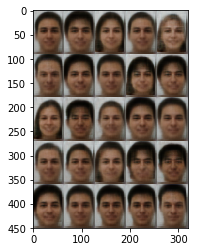

In [17]:
with tf.Session() as sess:
    saver = tf.train.Saver()
    sess.run(tf.global_variables_initializer())
    saver.restore(sess,'./checkpoints/fei'+str(latent_size)+'.ckpt')
    Zs = sess.run(Z,{X:data[0:25]})
    imgs = sess.run(out,{d_in:Zs}).reshape((-1,90,64,3))
    result = _merge(imgs, (5,5), 25)
    plt.imsave(str(latent_size) + 'd_recon_'+str(epochs)+'_epochs.png',result)
    plt.imshow(result)


INFO:tensorflow:Restoring parameters from ./checkpoints/fei16_beta_50.ckpt
5 -5


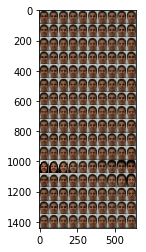

In [47]:
with tf.Session() as sess:
    #result=create_latent_manifold_2d(90,64,(20,20),'./checkpoints/fei{}.ckpt'.format(latent_size),data,c_=3)
    result=create_latent_manifold_nd(90,64,(10,10),
                                     latent_size,'./checkpoints/fei{}_beta_{}.ckpt'.format(latent_size,beta),
                                     data,c_=3,maxz=5,minz=-5)
    #plt.imsave('{}d_latent_manifold_fei_beta_{}.png'.format(latent_size,beta),result)
    plt.imshow(result)